<a href="https://colab.research.google.com/github/Rupeshgarsondiya/Deep-Learning/blob/main/Copy_of_BankLoanApprovalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['loan_data.csv']))

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()
df.duplicated().sum()  # In data no duplicate or null/mising value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

0

In [ ]:
# convert cetegoricaal column into numerical column using pandas dumeis funcation
df = pd.get_dummies(df,columns=['person_gender','person_education','person_home_ownership','loan_intent','loan_intent',
                   'previous_loan_defaults_on_file'],drop_first=True,dtype='int',sparse=False)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,0,0,1,0,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,0,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,1,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,1,0,0,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# perform train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create X and y
X = df.drop('loan_status', axis=1)
y = df['loan_status']
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Before traing a nueral network we need to normalize the data or scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)




(45000, 27)
(45000,)


In [ ]:
import numpy as np

print(np.shape(X_train_scaled))
print(np.shape(X_test_scaled))
print(y_train.shape)
print(y_test.shape)

(36000, 27)
(9000, 27)
(36000,)
(9000,)


In [ ]:
# Now we disign nueral network
import tensorflow as tf

from wandb.integration.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Now disign Nuearal network

model = Sequential()
model.add(Dense(27, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(13, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50,validation_split=0.2)



import numpy as np
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred>=0.5,1,0)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 27)                  │             756 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,134 (4.43 KB)

 Trainable params: 1,134 (4.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7915 - loss: 1.0250 - val_accuracy: 0.8864 - val_loss: 0.9087
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8934 - loss: 0.8940 - val_accuracy: 0.8907 - val_loss: 0.8988
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8970 - loss: 0.8827 - val_accuracy: 0.8915 - val_loss: 0.8964
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8992 - loss: 0.8823 - val_accuracy: 0.8914 - val_loss: 0.8953
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8982 - loss: 0.8877 - val_accuracy: 0.8914 - val_loss: 0.8952
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9007 - loss: 0.8797 - val_accuracy: 0.8926 - val_loss: 0.8941
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.8799 - val_accuracy: 0.8924 - val_loss: 0.8931
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8998 - loss: 0.8785 - val_accuracy: 0.

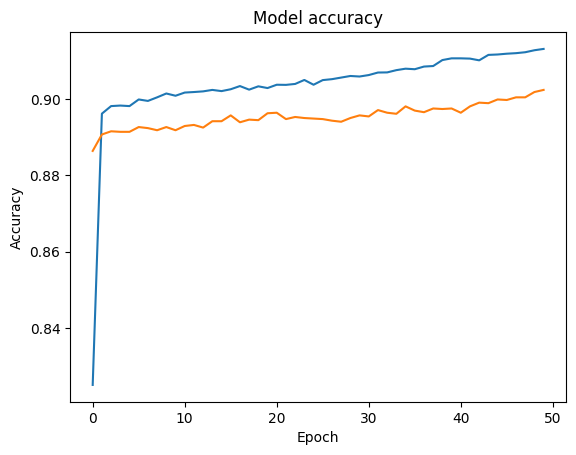

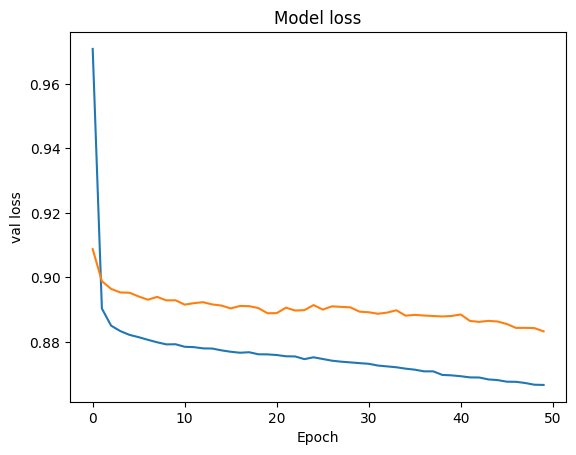

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('val loss')
plt.xlabel('Epoch')
plt.show()